<a href="https://colab.research.google.com/github/chizhikchi/gdg_menorca_RAG_tutorial/blob/main/generate_hotel_info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generación de Documentación para RAG
Este notebook genera automáticamente documentación hotelera a partir de un archivo JSON usando la API de Gemini. Los documentos generados se guardan en Google Drive y servirán como base de conocimiento para construir nuestro sistema RAG (Retrieval-Augmented Generation).

## 🤔 ¿Cómo funciona?

Entrada: Archivo JSON con plantillas de documentos (hotel_chatbot_documents.json)

Procesamiento: Gemini genera contenido personalizado para cada plantilla

Salida: Documentos de texto guardados en Drive, listos para el RAG

## ⚠️ Importante
1. No te olvides de cambiar las rutas para que se correspondan con la localización de tu .json con los prompts. Si no tienes uno, puedes cogerlo de [aquí](https://https://drive.google.com/file/d/1m-Nrq8mgsTVOGSKj2tnevvbIkdjO3HRB/view?usp=share_link). Tambien tienes que configurar la ruta al directorio donde se guardarán los archivos generados.
2. Es necesario añadir tu llave de API de Gemini en los 🗝 Secretos de Colab (la pestaña de la llave a la izquierda). Puedes generar tu llave de forma gratuita en [Google AI Studio](https://aistudio.google.com/apikey).

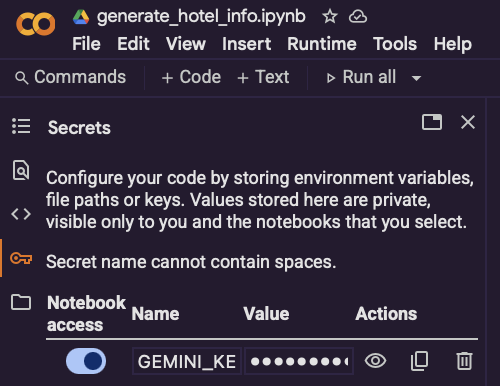


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Función Principal

`generate_hotel_info()` itera sobre cada documento del JSON, genera el contenido con Gemini y lo guarda como archivo .txt en la carpeta de salida.
Los documentos generados alimentarán la base de conocimiento del chatbot hotelero en el siguiente paso del tutorial.

In [ ]:
import base64
import os
from pathlib import Path
from google.colab import userdata
import google.generativeai as genai
from google.genai import types
import json
from tqdm import tqdm
import re

# Las rutas al json de los prompts y al directorio de salida

RUTA_JSON = "TU_DIRECTORIO/hotel_chatbot_documents.json"
OUTPUT_DIR = "TU_DIRECTORIO/documentos_generados"

# Instrucciones adicionales para el modelo

ADDTITIONAL_INSTRUCTIONS ="""
"\n IMPORTANTE: el nombre el hotel es GDG Menorca Resort y está ubicado en Menorca.
Todos los documentos generados tienen que estar en castellano
No incluyas ningún tipo de explicación o comentario, produce el contenido que se te pidió directamente.
"""

# Accedemos a la llave de api de Gemini
API_KEY = userdata.get('GEMINI_KEY')

def open_json(file_path):
  with open(file_path, "r") as f:
      return json.load(f)

# Nos aseguramos de que los nombres de los archivos no darán problemas
def sanitize_filename(name):
    return re.sub(r"[^\w\-_. ]", "_", name)

def generate_hotel_info():
  # Desempaquetamos el json
  documents = open_json(RUTA_JSON)
  # Creamos el directorio del corpus
  output_dir = Path(OTPUT_DIR)
  output_dir.mkdir(exist_ok=True)
  # Configuramos la interfaz del modelo
  genai.configure(api_key=API_KEY)
  gemini_model = genai.GenerativeModel('gemini-2.5-flash')
  # Iteramos a través de los documents
  for doc in tqdm(documents, desc='Generating files'):
    title = doc['title']
    prompt = doc['prompt']
    prompt = prompt + ADDTITIONAL_INSTRUCTIONS
    filename = sanitize_filename(title) + ".txt"
    filepath = output_dir / filename
    try:
        # Generamos nuestro archivo
        response = gemini_model.generate_content(prompt)
        content = response.text.strip()
        # Guardamos
        with open(filepath, "w", encoding="utf-8") as f:
            f.write(content)


    except Exception as e:
        print(f"Error generating '{title}': {e}")

In [ ]:
generate_hotel_info()

Generating files: 100%|██████████| 12/12 [02:07<00:00, 10.65s/it]
